In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.0.0-beta1


In [10]:
credit-a.csv

NameError: name 'credit' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_csv('../../credit-a.csv', header=None)

In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [13]:
data.iloc[:, -1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [14]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

In [15]:
model = tf.keras.Sequential()

In [16]:
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
)

In [19]:
history = model.fit(x, y, epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 346us/sample - loss: 3.8534 - acc: 0.6799
Epoch 2/100
653/653 [==============================] - 0s 42us/sample - loss: 3.8023 - acc: 0.6753
Epoch 3/100
653/653 [==============================] - 0s 40us/sample - loss: 3.7291 - acc: 0.6753
Epoch 4/100
653/653 [==============================] - 0s 37us/sample - loss: 3.6115 - acc: 0.6738
Epoch 5/100
653/653 [==============================] - 0s 40us/sample - loss: 3.4930 - acc: 0.6723
Epoch 6/100
653/653 [==============================] - 0s 40us/sample - loss: 3.3473 - acc: 0.6662
Epoch 7/100
653/653 [==============================] - 0s 37us/sample - loss: 3.1646 - acc: 0.6600
Epoch 8/100
653/653 [==============================] - 0s 40us/sample - loss: 2.9628 - acc: 0.6616
Epoch 9/100
653/653 [==============================] - 0s 43us/sample - loss: 2.7241 - acc: 

653/653 [==============================] - 0s 38us/sample - loss: 0.6481 - acc: 0.6784
Epoch 80/100
653/653 [==============================] - 0s 40us/sample - loss: 0.6366 - acc: 0.6708
Epoch 81/100
653/653 [==============================] - 0s 38us/sample - loss: 0.6256 - acc: 0.6753
Epoch 82/100
653/653 [==============================] - 0s 39us/sample - loss: 0.6207 - acc: 0.6769
Epoch 83/100
653/653 [==============================] - 0s 38us/sample - loss: 0.6208 - acc: 0.6799
Epoch 84/100
653/653 [==============================] - 0s 38us/sample - loss: 0.6144 - acc: 0.6830
Epoch 85/100
653/653 [==============================] - 0s 38us/sample - loss: 0.6113 - acc: 0.6845
Epoch 86/100
653/653 [==============================] - 0s 38us/sample - loss: 0.6102 - acc: 0.6845
Epoch 87/100
653/653 [==============================] - 0s 44us/sample - loss: 0.6074 - acc: 0.6861
Epoch 88/100
653/653 [==============================] - 0s 39us/sample - loss: 0.6047 - acc: 0.6861
Epoch 89/100


In [20]:
history.history.keys()

dict_keys(['loss', 'acc'])

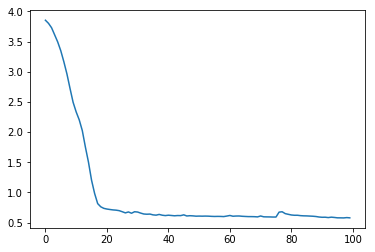

In [21]:
plt.plot(history.epoch, history.history.get('loss'))

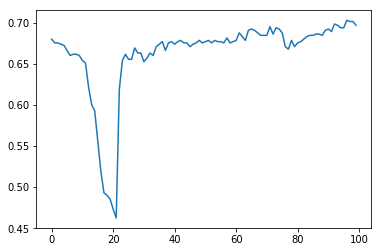

In [22]:
plt.plot(history.epoch, history.history.get('acc'))

In [27]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])
 
df.columns = ['color', 'size', 'prize', 'class label']
 
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}
df['size'] = df['size'].map(size_mapping)
 
class_mapping = {label:idx for idx,label in enumerate(set(df['class label']))}
print(set(df['class label']))
print(class_mapping)
df['class label'] = df['class label'].map(class_mapping)

{'class2', 'class1'}
{'class2': 0, 'class1': 1}


In [24]:
df

,color,size,prize,class label
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1
